In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
# Reading file from iMDB database

df = pd.read_csv('title.basics.tsv.gz', delimiter = '\t')

df.head(10)

C:\Users\khusaai1\AppData\Local\Temp\1\ipykernel_26420\3916217489.py:3: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('title.basics.tsv.gz', delimiter = '\t')


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,Short
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [3]:
# Excluding END YEAR

df = df.loc[:,df.columns!='endYear']
df.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,5,"Animation,Short"
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0,1892,5,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,1,Short
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
9,tt0000010,short,Leaving the Factory,La sortie de l'usine Lumière à Lyon,0,1895,1,"Documentary,Short"


In [4]:
# Selecting titles typed as Movie and excluding null runtimes and null start years

df = df[(df['titleType'] == 'movie') & (df['runtimeMinutes'] != '\\N' ) & (df['genres'] != '\\N' ) & (df['startYear'] != '\\N' )]

df.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
144,tt0000147,movie,The Corbett-Fitzsimmons Fight,The Corbett-Fitzsimmons Fight,0,1897,100,"Documentary,News,Sport"
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
672,tt0000679,movie,The Fairylogue and Radio-Plays,The Fairylogue and Radio-Plays,0,1908,120,"Adventure,Fantasy"
930,tt0000941,movie,Locura de amor,Locura de amor,0,1909,45,Drama
1172,tt0001184,movie,Don Juan de Serrallonga,Don Juan de Serrallonga,0,1910,58,"Adventure,Drama"
1273,tt0001285,movie,The Life of Moses,The Life of Moses,0,1909,50,"Biography,Drama,Family"
1485,tt0001498,movie,The Battle of Trafalgar,The Battle of Trafalgar,0,1911,51,War
1578,tt0001592,movie,In the Prime of Life,Ekspeditricen,0,1911,52,Drama


In [5]:
df=df[df['genres'].isin(['Documentary','ComedyHorror','Thriller','Comedy','Drama','Action','Romance','Crime','Music','Family','Sci-Fi','Animation','Biography','Mystery','Fantasy','Biography','Musical'])]


df.head(50)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
930,tt0000941,movie,Locura de amor,Locura de amor,0,1909,45,Drama
1578,tt0001592,movie,In the Prime of Life,Ekspeditricen,0,1911,52,Drama
1600,tt0001614,movie,The Four Devils,De fire djævle,0,1911,60,Drama
1773,tt0001790,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,60,Drama
1794,tt0001812,movie,Oedipus Rex,Oedipus Rex,0,1911,56,Drama
1872,tt0001892,movie,Den sorte drøm,Den sorte drøm,0,1911,53,Drama
1941,tt0001964,movie,The Traitress,Die Verräterin,0,1911,48,Drama
1974,tt0001998,movie,The Adventures of Lieutenant Petrosino,The Adventures of Lieutenant Petrosino,0,1912,47,Drama


In [6]:
df['startYear'] = df['startYear'].astype(int)

df.head(50)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,45,Romance
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,90,Drama
930,tt0000941,movie,Locura de amor,Locura de amor,0,1909,45,Drama
1578,tt0001592,movie,In the Prime of Life,Ekspeditricen,0,1911,52,Drama
1600,tt0001614,movie,The Four Devils,De fire djævle,0,1911,60,Drama
1773,tt0001790,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,60,Drama
1794,tt0001812,movie,Oedipus Rex,Oedipus Rex,0,1911,56,Drama
1872,tt0001892,movie,Den sorte drøm,Den sorte drøm,0,1911,53,Drama
1941,tt0001964,movie,The Traitress,Die Verräterin,0,1911,48,Drama
1974,tt0001998,movie,The Adventures of Lieutenant Petrosino,The Adventures of Lieutenant Petrosino,0,1912,47,Drama


In [7]:
df['startYear'] = df['startYear'].astype(int) # Change startYear type to int

df = df[(df['startYear']>=1910) & (df['startYear']<=2024)] # Limit startYear to 1910-2024

df.tail(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres
11476751,tt9914582,movie,However Long,However Long,0,2019,77,Documentary
11476781,tt9914642,movie,Albatross,Albatross,0,2017,97,Documentary
11476782,tt9914644,movie,9/11: Escape from the Towers,9/11: Escape from the Towers,0,2018,83,Documentary
11476912,tt9914942,movie,Life Without Sara Amat,La vida sense la Sara Amat,0,2019,74,Drama
11476927,tt9914972,movie,Blind Ambition,Blind Ambition,0,2021,96,Documentary
11477128,tt9915436,movie,Vida em Movimento,Vida em Movimento,0,2019,70,Documentary
11477279,tt9915790,movie,Bobbyr Bondhura,Bobbyr Bondhura,0,2019,106,Family
11477342,tt9915946,movie,Nuestra película,Nuestra película,0,1993,96,Documentary
11477395,tt9916058,movie,"Cali: ayer, hoy y mañana","Cali: ayer, hoy y mañana",0,1995,250,Documentary
11477425,tt9916124,movie,The Taste Is Mine,Mucho gusto,0,1997,108,Documentary


In [34]:
grouped = df.groupby(['genres','startYear'],as_index=False)

grouped.agg('count')

df1 = grouped.agg('count')




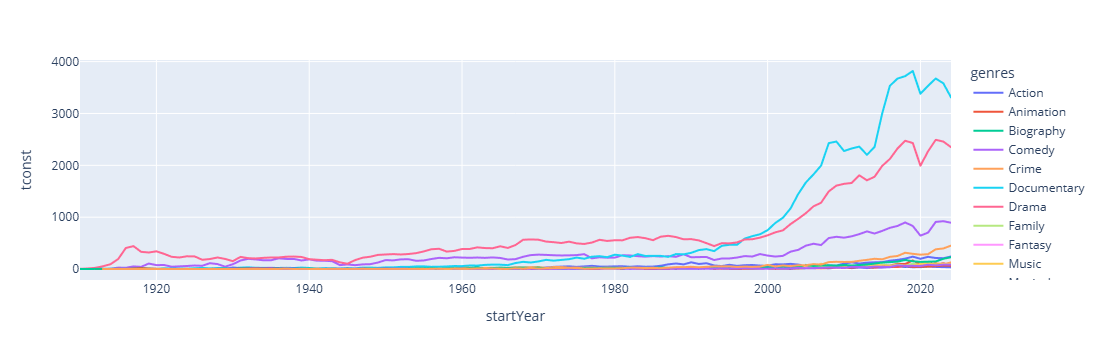

In [35]:
fig = px.line(df1, x='startYear', y='tconst', color = 'genres')
fig.show()